In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('phi_jet')
    scalar.append('pt_jet_g')
    scalar.append('phi_jet_g')
    scalar.append('pt_quark')
    scalar.append('eta_quark')
    scalar.append('phi_quark')
    scalar.append('pt_photon')
    scalar.append('phi_photon')
    scalar.append('eta_electron')
    scalar.append('pt_electron')
    scalar.append('zg')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
files = ["$HOME/EIC/output/925.root"]
a = getData(files)


Processed $HOME/EIC/output/925.root in 130.9 seconds


In [4]:
# general cuts
d = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
d = applyCut(d, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
d = applyCut(d, 'W2 > 4', 'W2 > 4')

pt_electron > 4 1926302  fraction kept: 4.4
0.01 < y < 0.85 1841645  fraction kept: 95.6
W2 > 4 1841645  fraction kept: 100.0


In [5]:
e = fixPhi(d, 'photon')

Fixed photon phi range
Fixed photon delta phi range


In [6]:
def plot(df_array, label_array, color_array):
    for i in range(0,len(df_array)):
        plt.hist(df_array[i]['delta_phi_photon_abs'], label='$ '+ label_array[i] + ' GeV$', range=(0,3.5), bins=350, histtype='step', fill=False, stacked=True, normed=True, color=color_array[i], linewidth=2)

/home/youqi/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


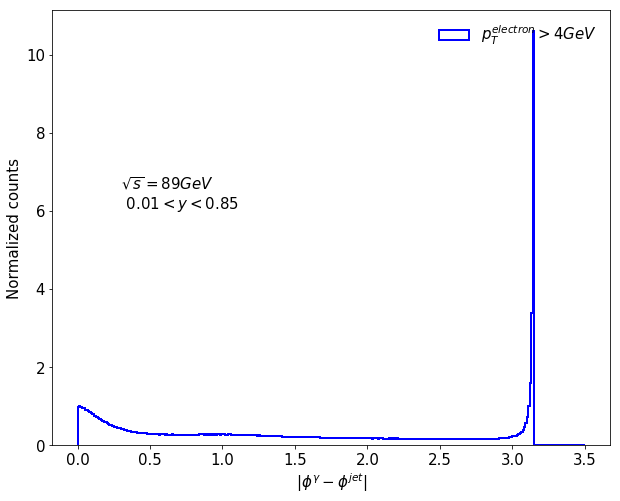

In [7]:
fig = plt.figure(figsize=(10,8))
plot([e], ['p_T^{electron} > 4'], ['b'])
plt.text(0.3,6,'$\sqrt{s} = 89 GeV$ \n $ 0.01 < y < 0.85$', fontsize=15)
plt.xlabel('$|\phi^{\gamma}-\phi^{jet}|$', fontsize=15)
plt.ylabel('Normalized counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')

In [3]:
files = ["$HOME/EIC/output/102.root"]
a = getData(files)


Processed $HOME/EIC/output/102.root in 127.4 seconds


In [4]:
# general cuts
d = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
d = applyCut(d, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
d = applyCut(d, 'W2 > 4', 'W2 > 4')

pt_electron > 4 1548370  fraction kept: 4.3
0.01 < y < 0.85 1488329  fraction kept: 96.1
W2 > 4 1488329  fraction kept: 100.0


In [5]:
e = fixPhi(d, 'photon')

Fixed photon phi range
Fixed photon delta phi range


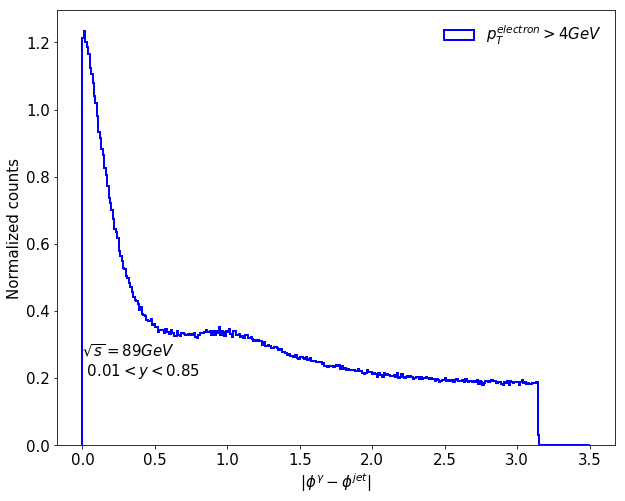

In [10]:
fig = plt.figure(figsize=(10,8))
plot([e], ['p_T^{electron} > 4'], ['b'])
plt.text(0.0,0.2,'$\sqrt{s} = 89 GeV$ \n $ 0.01 < y < 0.85$', fontsize=15)
plt.xlabel('$|\phi^{\gamma}-\phi^{jet}|$', fontsize=15)
plt.ylabel('Normalized counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')